In [5]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import sdf

## Chiller

In [6]:
# load Dymola results
file_name = 'results/chiller/Cycle.mat'
data = sdf.load(file_name)
p_suc = data["y[1]"].data
p_dis = data["y[2]"].data
T_e = data["y[3]"].data
T_c = data["y[4]"].data
T_sh = data["y[5]"].data
T_sc = data["y[6]"].data
Pwr = data["y[7]"].data
p_suc_mea = data["y_mea[1]"].data
p_dis_mea = data["y_mea[2]"].data
T_e_mea = data["y_mea[3]"].data
T_c_mea = data["y_mea[4]"].data
T_sh_mea = data["y_mea[5]"].data
T_sc_mea = data["y_mea[6]"].data
Pwr_mea = data["y_mea[7]"].data
t = data["Time"].data
t = (t - t[0]) / 3600
y = np.hstack((p_suc[:,None], p_dis[:,None], T_e[:,None], T_c[:,None], T_sh[:,None], T_sc[:,None], Pwr[:,None]))
y_mea = np.hstack((p_suc_mea[:,None], p_dis_mea[:,None], T_e_mea[:,None], T_c_mea[:,None], T_sh_mea[:,None], T_sc_mea[:,None], Pwr_mea[:,None]))

(array([ 2.,  4.,  6.,  8., 10.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

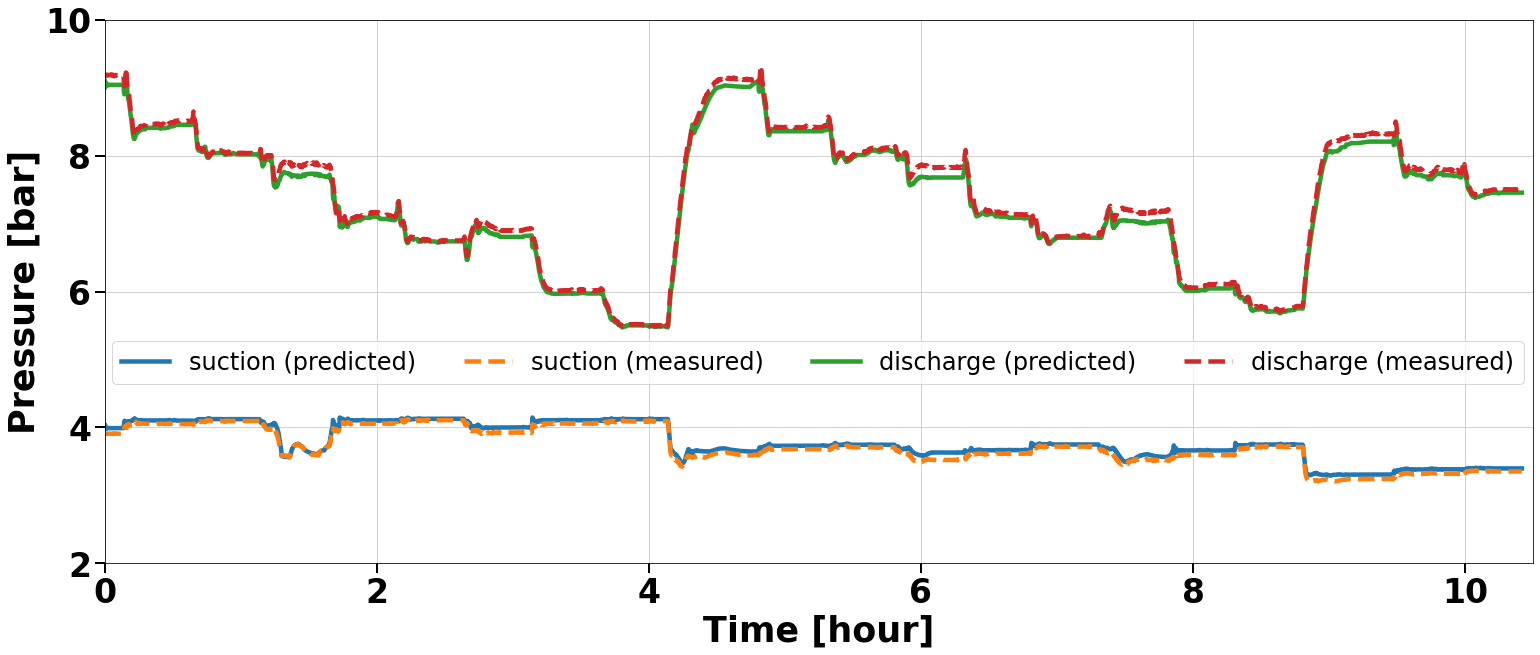

In [3]:
# pressure
fig, ax = plt.subplots(figsize=(25.6, 10))
ax.plot(t, p_suc/1e5, '-', linewidth=4.5, label='suction (predicted)')
ax.plot(t, p_suc_mea/1e5, '--', linewidth=4.5, label='suction (measured)')
ax.plot(t, p_dis/1e5, '-', linewidth=4.5, label='discharge (predicted)')
ax.plot(t, p_dis_mea/1e5, '--', linewidth=4.5, label='discharge (measured)')
ax.grid(alpha=0.7)
ax.set_xlim(0., 10.5)
ax.set_ylim(2., 10.)
ax.set_xlabel('Time [hour]', fontsize=35, fontweight=600)
ax.set_ylabel('Pressure [bar]', fontsize=35, fontweight=600)
ax.tick_params(axis='both', labelsize=34, width=2, length=10, direction='out')
ax.legend(loc=(0.005, 0.33), ncol=4, fontsize=24)
plt.xticks(fontsize=33, fontweight='bold')
plt.yticks(fontsize=33, fontweight='bold')

(array([270., 280., 290., 300., 310., 320.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

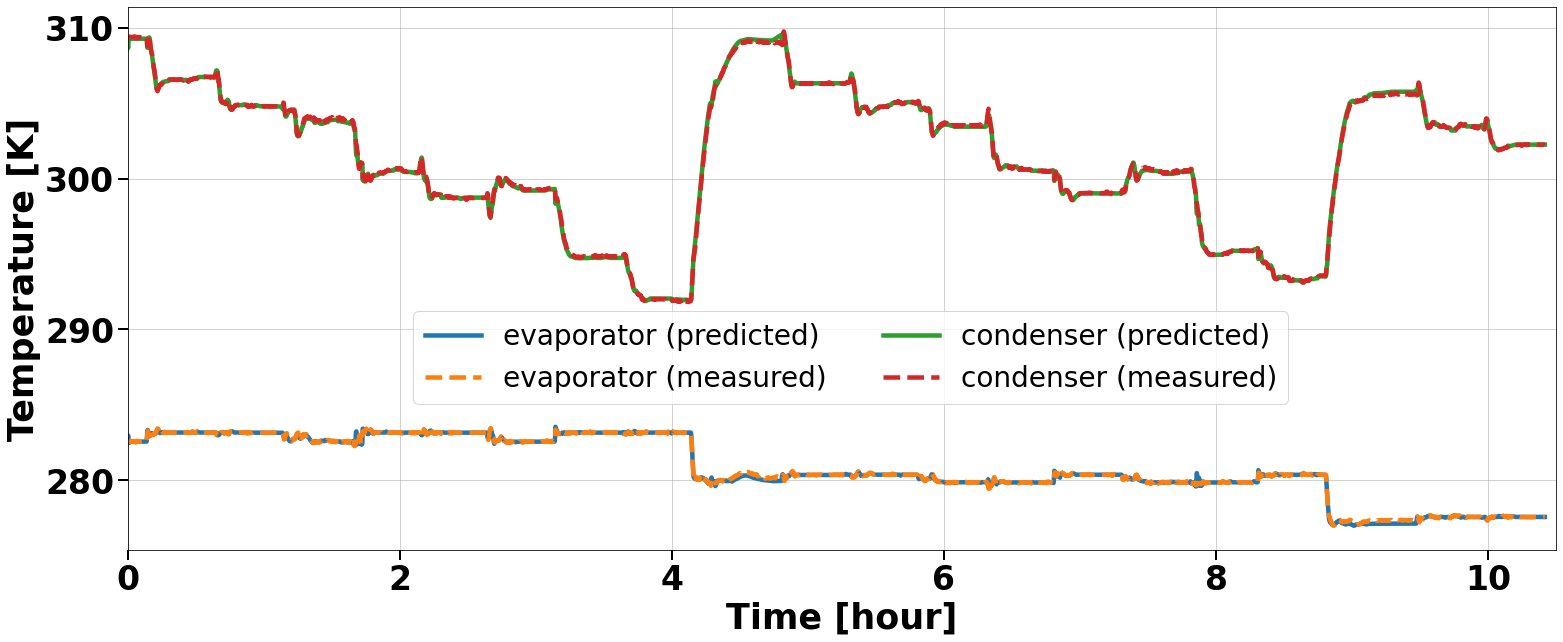

In [7]:
# water exit temperature
fig, ax = plt.subplots(figsize=(25.6, 10))
ax.plot(t, T_e, '-', linewidth=4.5, label='evaporator (predicted)')
ax.plot(t, T_e_mea, '--', linewidth=4.5, label='evaporator (measured)')
ax.plot(t, T_c, '-', linewidth=4.5, label='condenser (predicted)')
ax.plot(t, T_c_mea, '--', linewidth=4.5, label='condenser (measured)')
ax.set_xlim(0., 10.5)
ax.grid(alpha=0.7)
ax.set_xlabel('Time [hour]', fontsize=35, fontweight=600)
ax.set_ylabel('Temperature [K]', fontsize=35, fontweight=600)
ax.tick_params(axis='both', labelsize=34, width=2, length=10, direction='out')
ax.legend(loc=(0.2, 0.27), ncol=2, fontsize=28)
plt.xticks(fontsize=33, fontweight='bold')
plt.yticks(fontsize=33, fontweight='bold')


(array([-10.,  -5.,   0.,   5.,  10.,  15.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

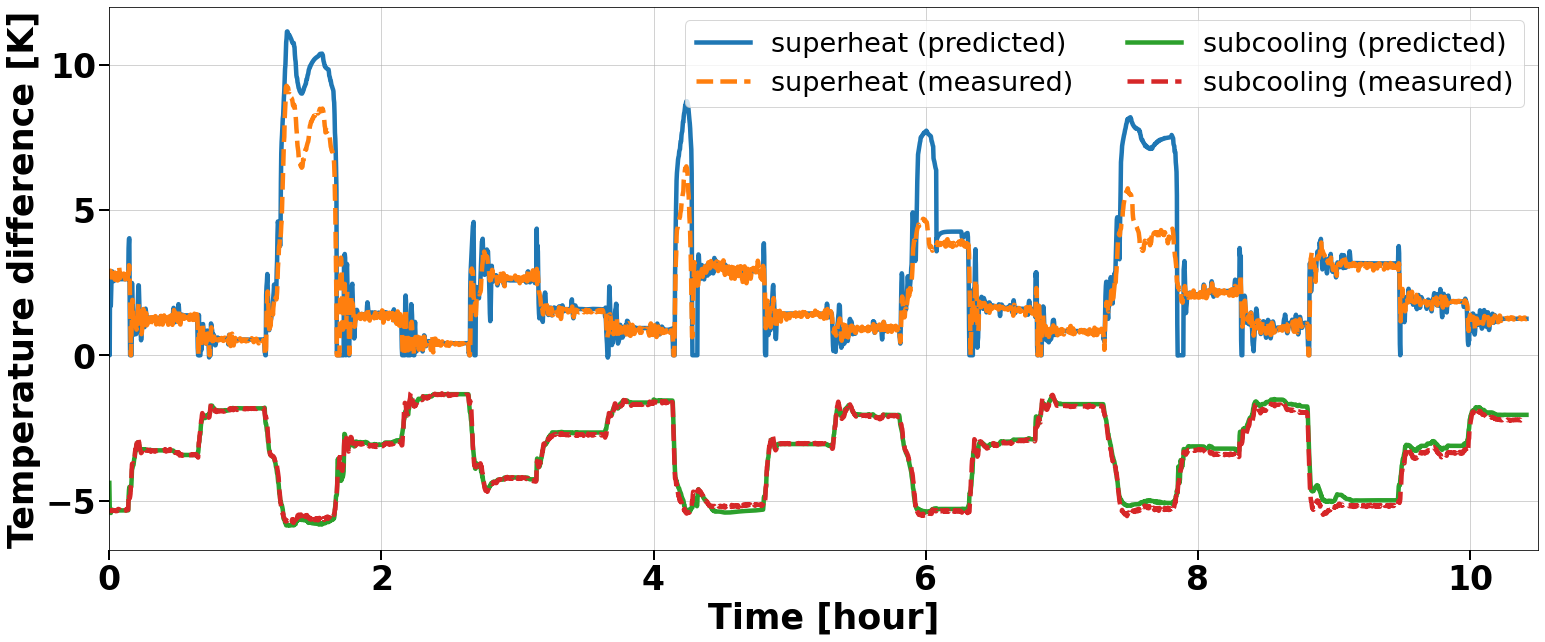

In [8]:
# superheat and subcooling
fig, ax = plt.subplots(figsize=(25.6, 10))
ax.plot(t, T_sh, linewidth=4.5, label='superheat (predicted)')
ax.plot(t, T_sh_mea, '--', linewidth=4.5, label='superheat (measured)')
ax.plot(t, T_sc, '-', linewidth=4.5, label='subcooling (predicted)')
ax.plot(t, T_sc_mea, '--', linewidth=4.5, label='subcooling (measured)')
ax.set_xlim(0., 10.5)
ax.grid(alpha=0.7)
ax.set_xlabel('Time [hour]', fontsize=35, fontweight=600)
ax.set_ylabel('Temperature difference [K]', fontsize=35, fontweight=600)
ax.tick_params(axis='both', labelsize=34, width=2, length=10, direction='out')
ax.legend(loc='best', ncol=2, fontsize=27)
plt.xticks(fontsize=33, fontweight='bold')
plt.yticks(fontsize=33, fontweight='bold')

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

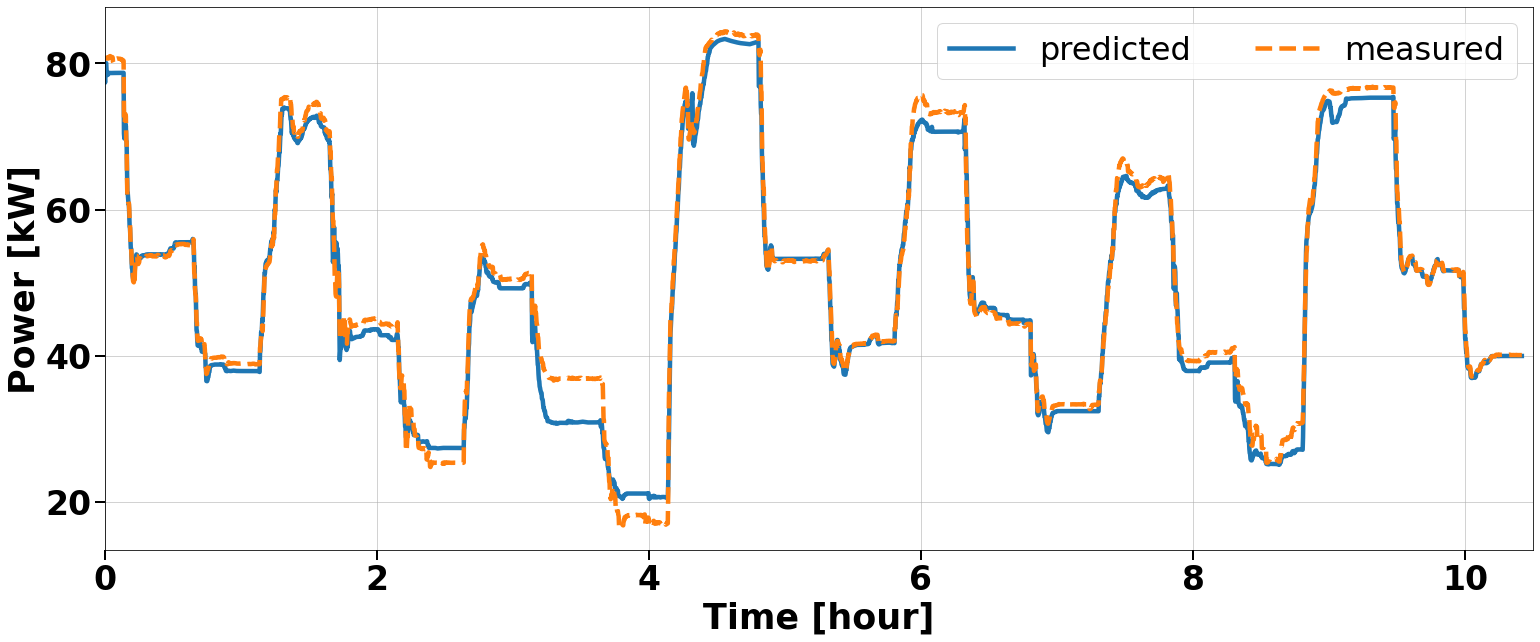

In [9]:
# power
fig, ax = plt.subplots(figsize=(25.6, 10))
ax.plot(t, Pwr/1e3, linewidth=4.5, label='predicted')
ax.plot(t, Pwr_mea/1e3, '--', linewidth=4.5, label='measured')
ax.set_xlim(0, 10.5)
ax.grid(alpha=0.7)
ax.set_xlabel('Time [hour]', fontsize=35, fontweight=600)
ax.set_ylabel('Power [kW]', fontsize=35, fontweight=600)
ax.tick_params(axis='both', labelsize=34, width=2, length=10, direction='out')
ax.legend(loc='best', ncol=2, fontsize=32)
plt.xticks(fontsize=33, fontweight='bold')
plt.yticks(fontsize=33, fontweight='bold')

[Text(0, 3, '0.0152'),
 Text(0, 3, '0.0112'),
 Text(0, 3, '0.0003'),
 Text(0, 3, '0.0003'),
 Text(0, 3, '0.3709'),
 Text(0, 3, '0.0428'),
 Text(0, 3, '0.0384')]

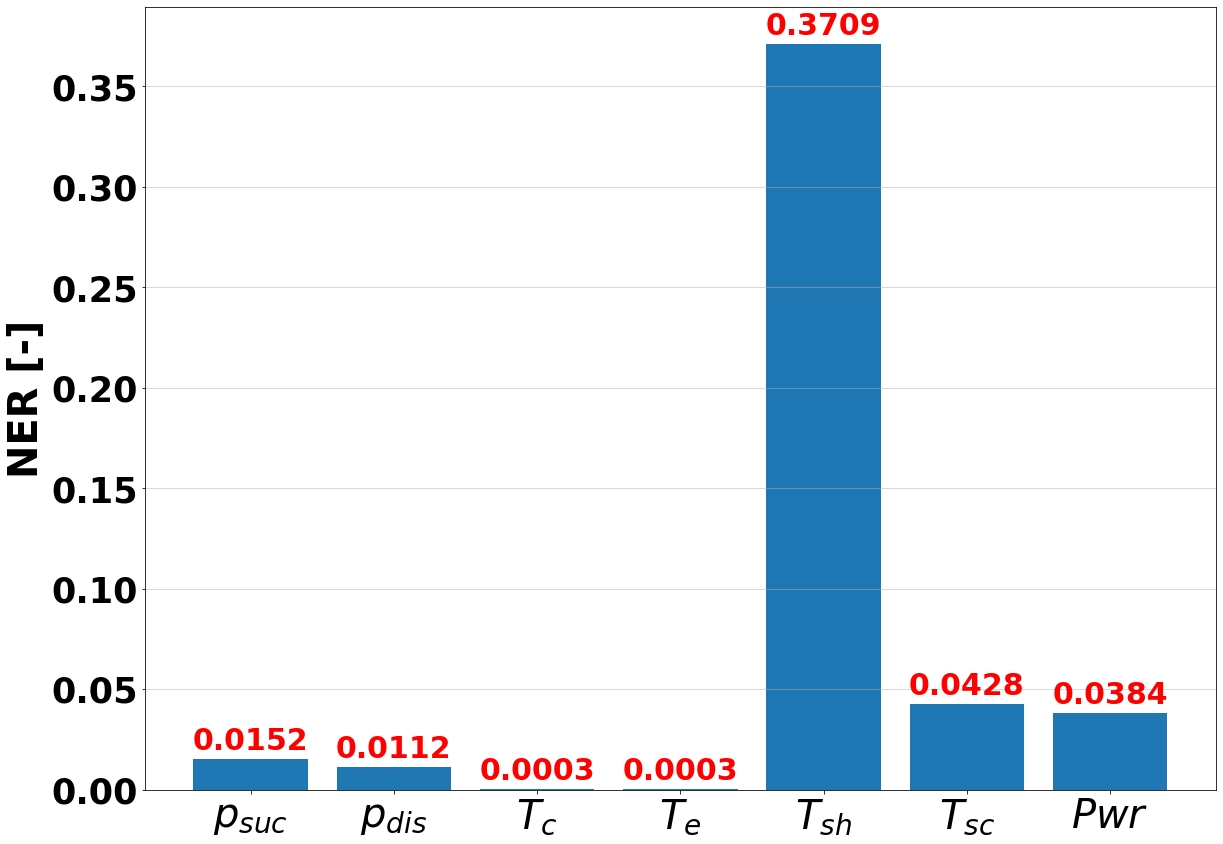

In [13]:
# NER
ner = np.linalg.norm(y-y_mea, axis=0) / np.linalg.norm(y_mea, axis=0)
fig, ax = plt.subplots(figsize=(19.2, 14.4))
bar_labels = ['$p_{suc}$', '$p_{dis}$', '$T_c$', '$T_e$', '$T_{sh}$', '$T_{sc}$', '$Pwr$']
bar_values = np.round(ner, 4)
bars = ax.bar(bar_labels, ner)
ax.set_ylabel('NER [-]', fontsize=40, fontweight='bold')
ax.grid(axis='y', alpha=0.6)
plt.xticks(fontsize=40, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
ax.bar_label(bars, labels=bar_values, padding=3, fontsize=30, fontweight='bold', color='r')

(array([0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 ]),
 [Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, '')])

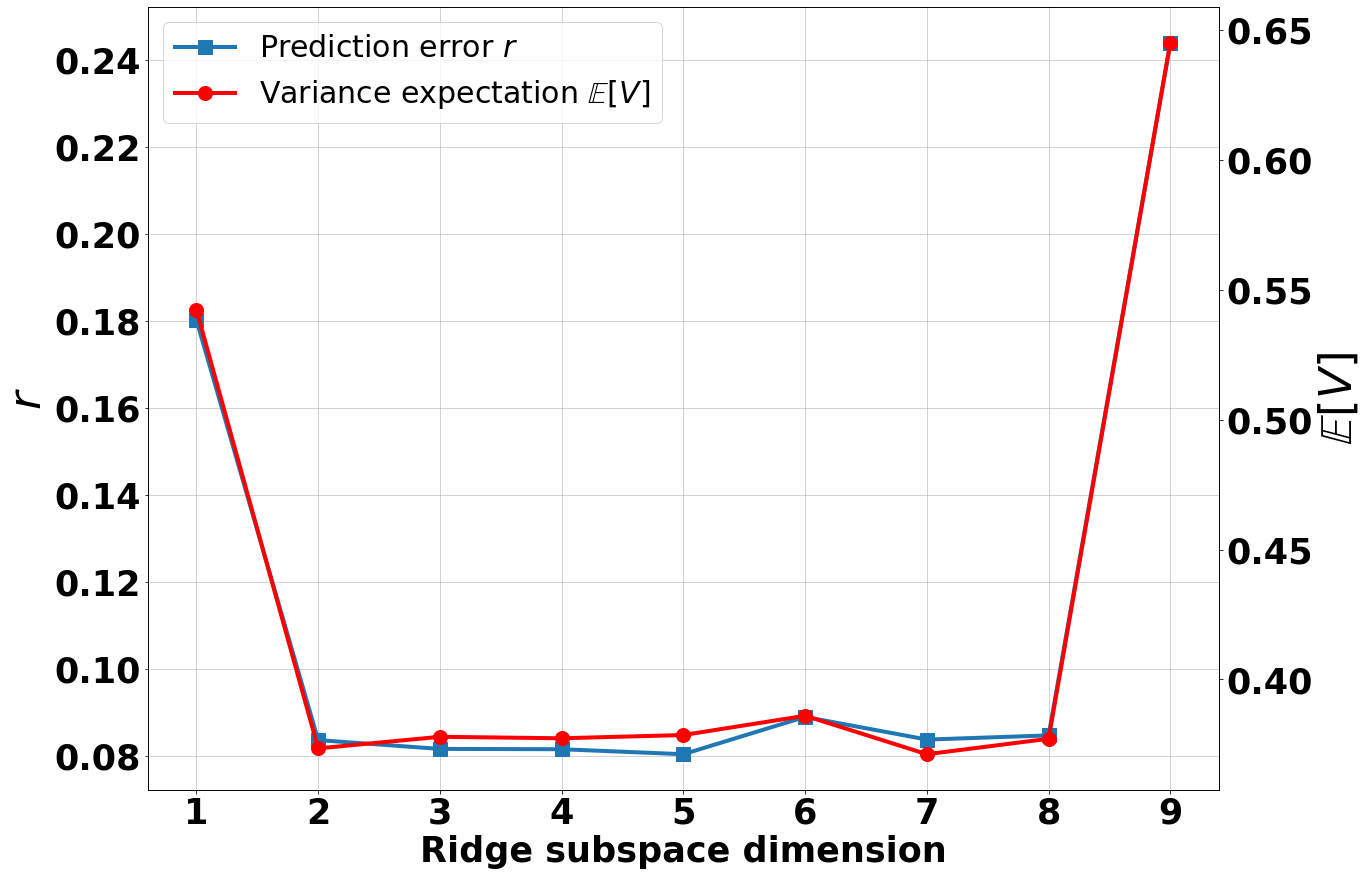

In [29]:
# all dimension error and variance expectation
allDimensionResult = np.load('results/chiller/allDimensionResult.npz')
r_all = allDimensionResult['r_all']
E_var_all = allDimensionResult['E_var_all']

fig, ax = plt.subplots(figsize=(19.2,14.4))
x = range(1, len(r_all)+1)
ln1 = ax.plot(x, r_all, '-s', markersize=14, linewidth=4, label='Prediction error $r$')
ax.set_ylabel('$r$', fontsize=45, fontweight='bold')
ax.set_xlabel('Ridge subspace dimension', fontsize=35, fontweight='bold')
plt.xticks(x, fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
ax.grid(alpha=0.7)
ax1 = ax.twinx()
ax1.set_ylabel('$\mathbb{E}[V]$', fontsize=45, fontweight='bold')
ln2 = ax1.plot(x, E_var_all, 'r-o', markersize=14, linewidth=4, label='Variance expectation $\mathbb{E}[V]$')
lns = ln1+ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='best', fontsize=30)
plt.yticks(fontsize=35, fontweight='bold')


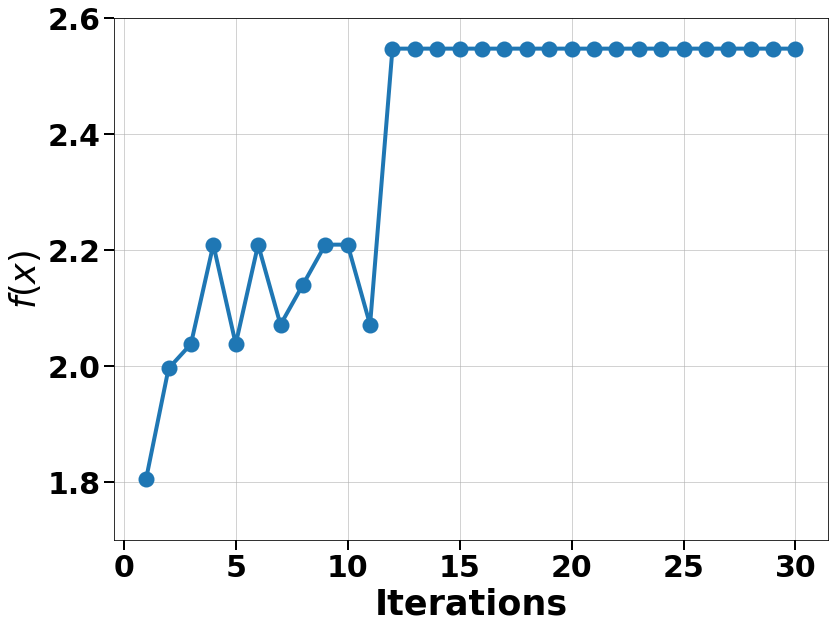

In [3]:
# BO iterations
BOresults = np.load('results/chiller/BOresults.npz')
x_all = BOresults['x_all']
y_all = BOresults['y_all']

fig, ax = plt.subplots(figsize=(12.8, 9.6))
ax.plot(range(1, len(y_all)+1), y_all, '-o', markersize=14, markeredgewidth=2, linewidth=4)
# ax.set_xticks(range(1,len(y_all)+1,5))
ax.tick_params(axis='both', labelsize=30, width=2, length=10, direction='out')
plt.xticks(fontsize=30, fontweight='bold')
plt.yticks(fontsize=30, fontweight='bold')
ax.set_xlabel('Iterations', fontsize=35, fontweight='bold')
ax.set_ylabel('$f(x)$', fontsize=35, fontweight='bold')
ax.set_ylim(1.7, 2.6)
ax.grid(alpha=0.7)

In [4]:
y_all

array([1.80643297, 1.99631417, 2.0385355 , 2.20988312, 2.0385355 ,
       2.20988312, 2.07180913, 2.14068271, 2.20988312, 2.20988312,
       2.07180913, 2.54793072, 2.54793072, 2.54793072, 2.54793072,
       2.54793072, 2.54793072, 2.54793072, 2.54793072, 2.54793072,
       2.54793072, 2.54793072, 2.54793072, 2.54793072, 2.54793072,
       2.54793072, 2.54793072, 2.54793072, 2.54793072, 2.54793072])

## Heat pump

In [16]:
file_name = '../../Greenspeed case study/Simulation results/GreenSpeedCycle.mat'
data = sdf.load(file_name)
p_dis = data["y[1]"].data
p_suc = data["y[2]"].data
T_c = data["y[3]"].data
T_e = data["y[4]"].data
T_sc = data["y[5]"].data
Pwr = data["y[6]"].data
p_dis_mea = data["y_mea[1]"].data
p_suc_mea = data["y_mea[2]"].data
T_c_mea = data["y_mea[3]"].data
T_e_mea = data["y_mea[4]"].data
T_sc_mea = data["y_mea[5]"].data
Pwr_mea = data["y_mea[6]"].data
t = data["Time"].data
t = (t - t[0]) / 3600

(array([ 0., 10., 20., 30., 40., 50.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

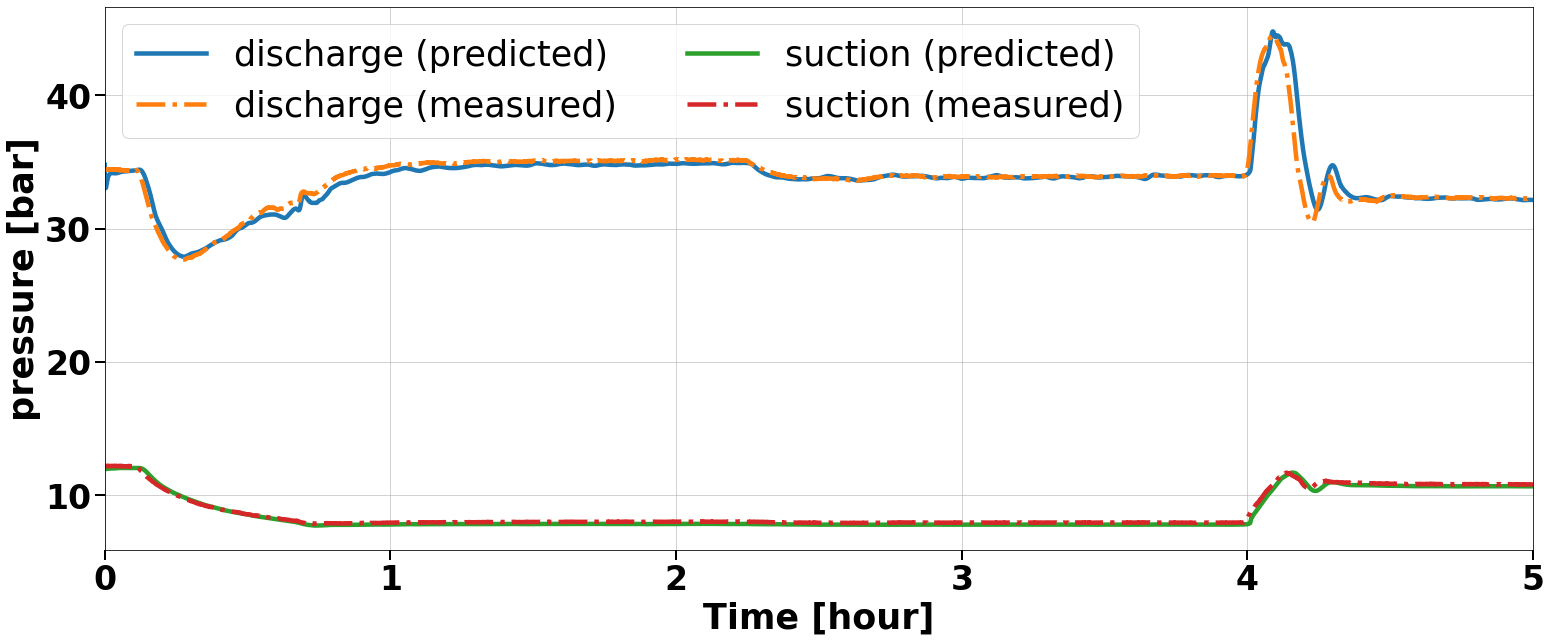

In [17]:
# pressure
fig, ax = plt.subplots(figsize=(25.6, 10))
ax.plot(t, p_dis/1e5, linewidth=4.5, label='discharge (predicted)')
ax.plot(t, p_dis_mea/1e5, '-.', linewidth=4.5, label='discharge (measured)')
ax.plot(t, p_suc/1e5, '-', linewidth=4.5, label='suction (predicted)')
ax.plot(t, p_suc_mea/1e5, '-.', linewidth=4.5, label='suction (measured)')
ax.set_xlim(0, 5)
ax.grid(alpha=0.7)
ax.set_xlabel('Time [hour]', fontsize=35, fontweight=600)
ax.set_ylabel('pressure [bar]', fontsize=35, fontweight=600)
ax.tick_params(axis='both', labelsize=40, width=2, length=10, direction='out')
ax.legend(loc='best', ncol=2, fontsize=35)
plt.xticks(fontsize=33, fontweight='bold')
plt.yticks(fontsize=33, fontweight='bold')

(array([270., 280., 290., 300., 310., 320., 330.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

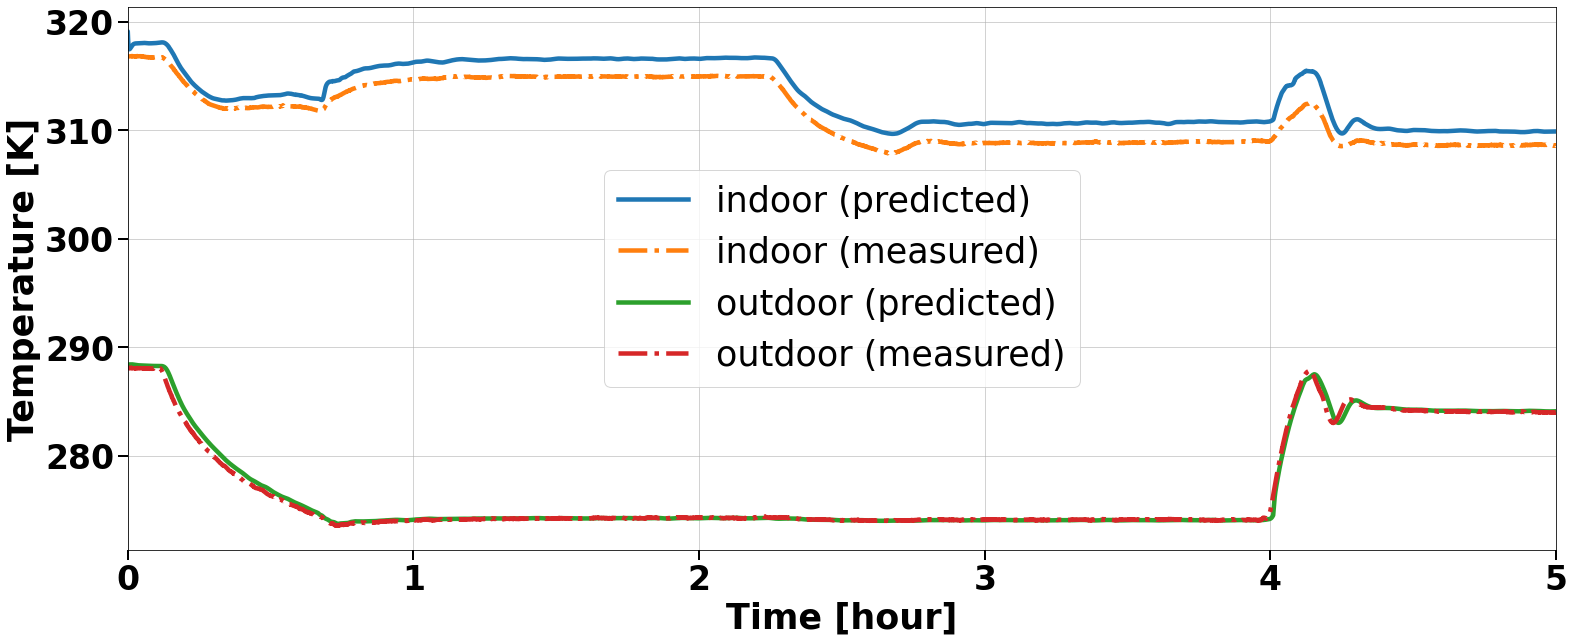

In [18]:
# air exit temperature
fig, ax = plt.subplots(figsize=(25.6, 10))
ax.plot(t, T_c, linewidth=4.5, label='indoor (predicted)')
ax.plot(t, T_c_mea, '-.', linewidth=4.5, label='indoor (measured)')
ax.plot(t, T_e, '-', linewidth=4.5, label='outdoor (predicted)')
ax.plot(t, T_e_mea, '-.', linewidth=4.5, label='outdoor (measured)')
ax.set_xlim(0, 5)
ax.grid(alpha=0.7)
ax.set_xlabel('Time [hour]', fontsize=35, fontweight=600)
ax.set_ylabel('Temperature [K]', fontsize=35, fontweight=600)
ax.tick_params(axis='both', labelsize=40, width=2, length=10, direction='out')
ax.legend(loc='best', ncol=1, fontsize=35)
plt.xticks(fontsize=33, fontweight='bold')
plt.yticks(fontsize=33, fontweight='bold')

(array([-50., -40., -30., -20., -10.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

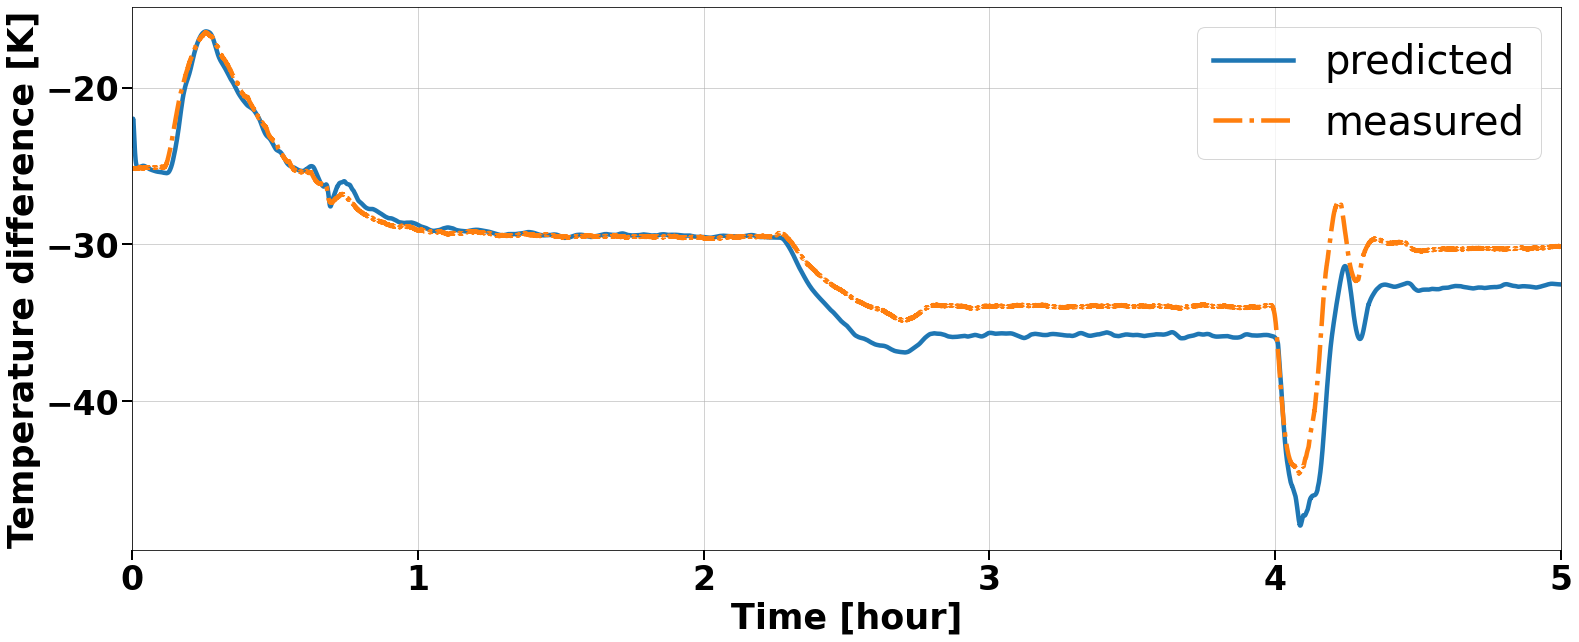

In [19]:
# subcooling
fig, ax = plt.subplots(figsize=(25.6, 10))
ax.plot(t, T_sc, linewidth=4.5, label='predicted')
ax.plot(t, T_sc_mea, '-.', linewidth=4.5, label='measured')
ax.set_xlim(0, 5)
ax.grid(alpha=0.7)
ax.set_xlabel('Time [hour]', fontsize=35, fontweight=600)
ax.set_ylabel('Temperature difference [K]', fontsize=35, fontweight=600)
ax.tick_params(axis='both', labelsize=40, width=2, length=10, direction='out')
ax.legend(loc='best', ncol=1, fontsize=40)
plt.xticks(fontsize=33, fontweight='bold')
plt.yticks(fontsize=33, fontweight='bold')

(array([1500., 1750., 2000., 2250., 2500., 2750., 3000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

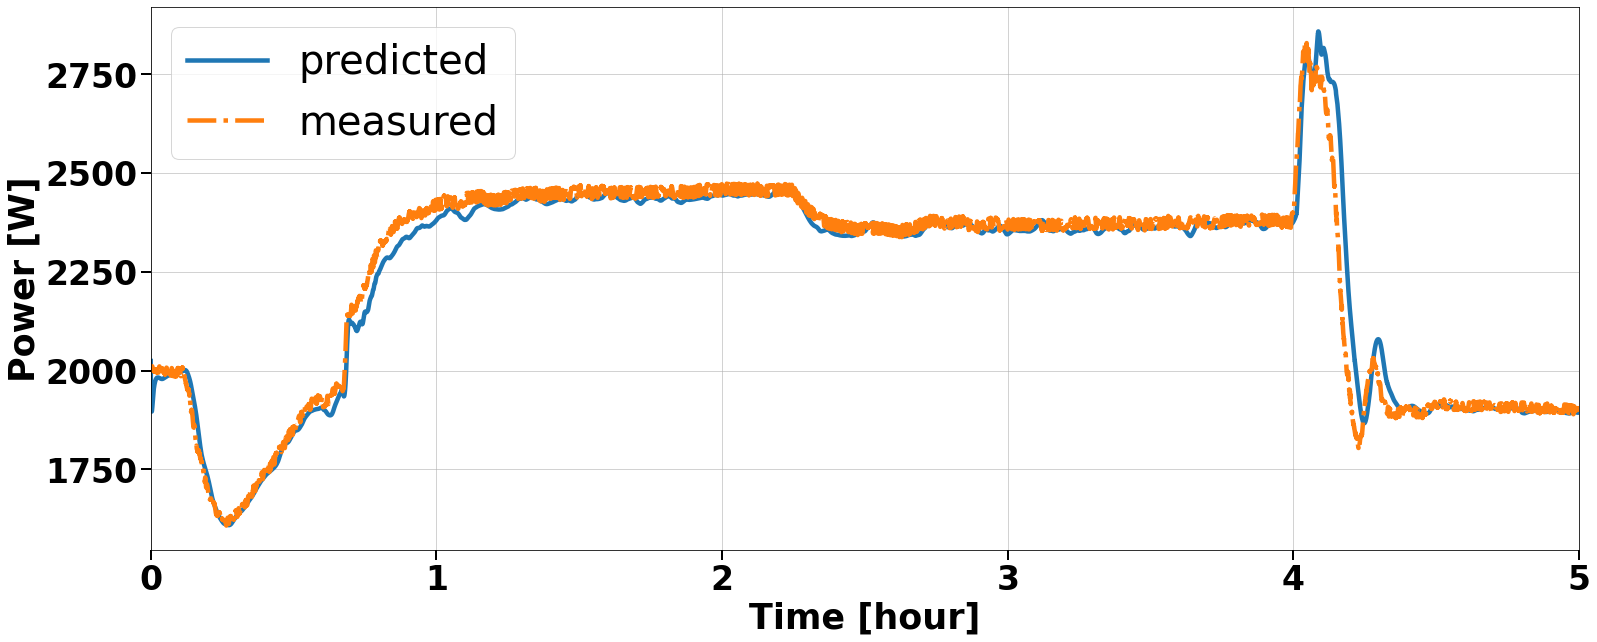

In [20]:
# power
fig, ax = plt.subplots(figsize=(25.6, 10))
ax.plot(t, Pwr, linewidth=4.5, label='predicted')
ax.plot(t, Pwr_mea, '-.', linewidth=4.5, label='measured')
ax.set_xlim(0, 5)
ax.grid(alpha=0.7)
ax.set_xlabel('Time [hour]', fontsize=35, fontweight=600)
ax.set_ylabel('Power [W]', fontsize=35, fontweight=600)
ax.tick_params(axis='both', labelsize=40, width=2, length=10, direction='out')
ax.legend(loc='best', ncol=1, fontsize=40)
plt.xticks(fontsize=33, fontweight='bold')
plt.yticks(fontsize=33, fontweight='bold')

[Text(0, 3, '0.019'),
 Text(0, 3, '0.019'),
 Text(0, 3, '0.005'),
 Text(0, 3, '0.001'),
 Text(0, 3, '0.061'),
 Text(0, 3, '0.021')]

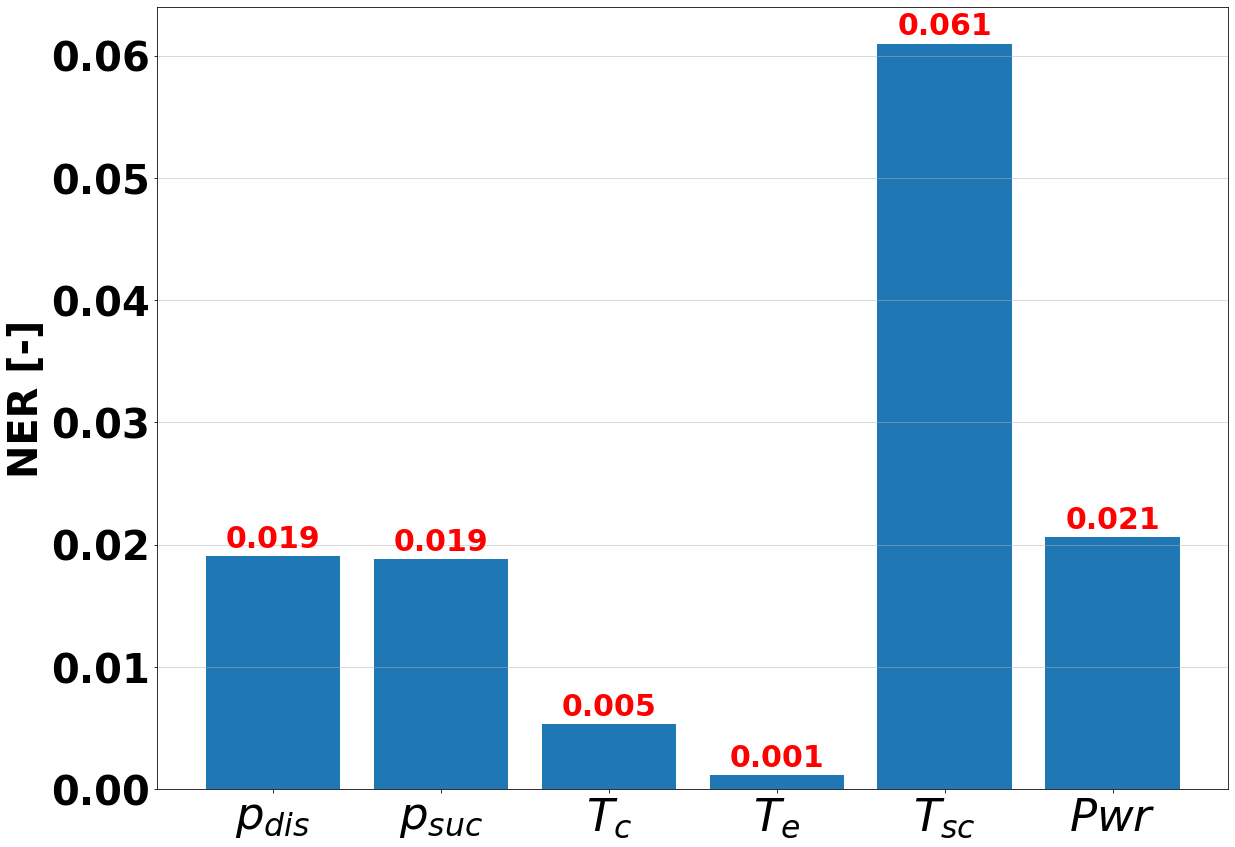

In [21]:
# NER
y = np.hstack((p_dis[:,None], p_suc[:,None], T_c[:,None], T_e[:,None], T_sc[:,None], Pwr[:,None]))
y_mea = np.hstack((p_dis_mea[:,None], p_suc_mea[:,None], T_c_mea[:,None], T_e_mea[:,None], T_sc_mea[:,None], Pwr_mea[:,None]))
ner = np.linalg.norm(y-y_mea, axis=0) / np.linalg.norm(y_mea, axis=0)
bar_labels = ['$p_{dis}$', '$p_{suc}$', '$T_c$', '$T_e$', '$T_{sc}$', '$Pwr$']
bar_values = np.round(ner, 3)
fig, ax = plt.subplots(figsize=(19.2, 14.4))
bars = ax.bar(bar_labels, ner)
ax.set_ylabel('NER [-]', fontsize=40, fontweight='bold')
ax.grid(axis='y', alpha=0.6)
plt.xticks(fontsize=45, fontweight='bold')
plt.yticks(fontsize=40, fontweight='bold')
# for i in range(len(bar_values)):
#     ax.text(i, bar_values[i], bar_values[i], ha='center', fontsize=35, fontweight=500)
ax.bar_label(bars, labels=bar_values, padding=3, fontsize=30, fontweight='bold', color='r')

(array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ]),
 [Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, '')])

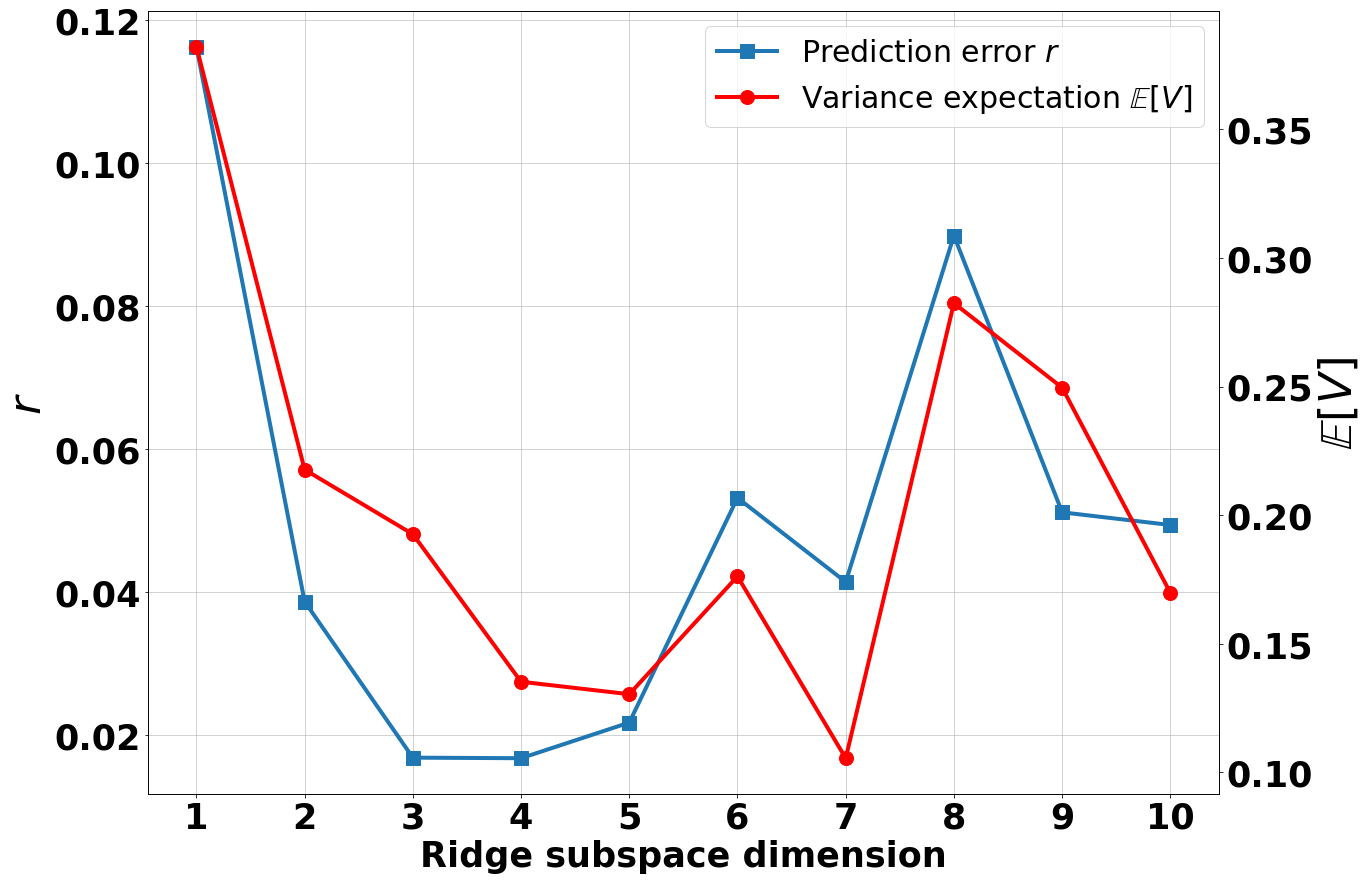

In [30]:
# all dimension results
allDimensionResult = np.load('results/heat pump/allDimensionResult.npz')
r_all = allDimensionResult['r_all']
E_var_all = allDimensionResult['E_var_all']

fig, ax = plt.subplots(figsize=(19.2,14.4))
x = range(1, len(r_all)+1)
ln1 = ax.plot(x, r_all, '-s', markersize=14, linewidth=4, label='Prediction error $r$')
ax.set_ylabel('$r$', fontsize=45, fontweight='bold')
ax.set_xlabel('Ridge subspace dimension', fontsize=35, fontweight='bold')
plt.xticks(x, fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
ax.grid(alpha=0.7)
ax1 = ax.twinx()
ax1.set_ylabel('$\mathbb{E}[V]$', fontsize=45, fontweight='bold')
ln2 = ax1.plot(x, E_var_all, 'r-o', markersize=14, linewidth=4, label='Variance expectation $\mathbb{E}[V]$')
lns = ln1+ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='best', fontsize=30)
plt.yticks(fontsize=35, fontweight='bold')

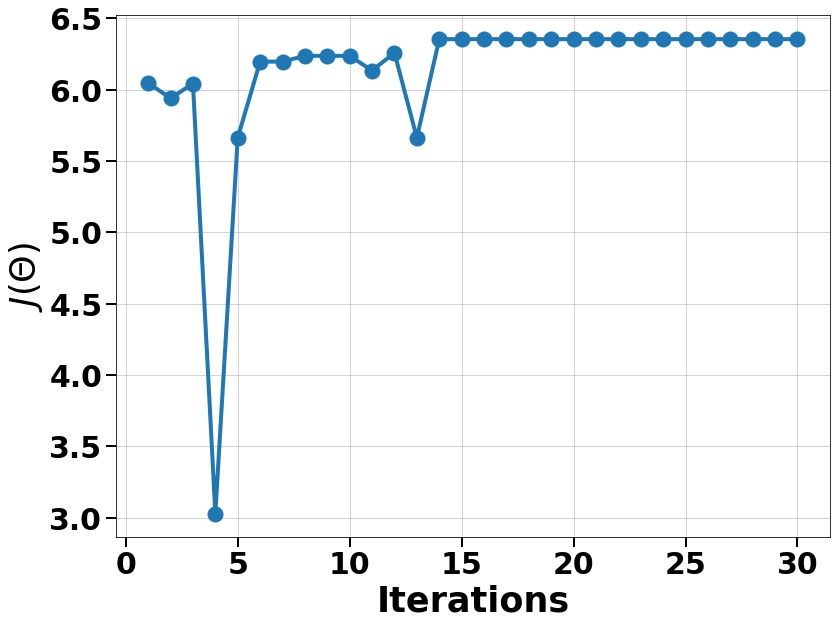

In [28]:
# BO iterations
BOresults = np.load('results/heat pump/BOresults.npz')
y_all = BOresults['y_all'][:30]

fig, ax = plt.subplots(figsize=(12.8, 9.6))
ax.plot(range(1, y_all.shape[0]+1), y_all, '-o', markersize=14, markeredgewidth=2, linewidth=4)
# ax.set_xticks(range(1,len(y_all)+1,5))
ax.tick_params(axis='both', labelsize=30, width=2, length=10, direction='out')
plt.xticks(fontsize=30, fontweight='bold')
plt.yticks(fontsize=30, fontweight='bold')
ax.set_xlabel('Iterations', fontsize=35, fontweight='bold')
ax.set_ylabel('$J(\Theta)$', fontsize=35, fontweight='bold')
# ax.set_ylim(1.7, 2.6)
ax.grid(alpha=0.7)

In [26]:
for i in range(y_all.shape[0]):
    print(i+1, y_all[i])

1 6.046414194278371
2 5.939312771291347
3 6.041938100371548
4 3.029772504090177
5 5.662663648723117
6 6.1959536213516415
7 6.1959536213516415
8 6.23655989253315
9 6.23655989253315
10 6.23655989253315
11 6.133410199244348
12 6.2580258516389495
13 5.662663648723117
14 6.353372058638517
15 6.353372058638517
16 6.353372058638517
17 6.353372058638517
18 6.353372058638517
19 6.353372058638517
20 6.353372058638517
21 6.353372058638517
22 6.353372058638517
23 6.353372058638517
24 6.353372058638517
25 6.353372058638517
26 6.353372058638517
27 6.353372058638517
28 6.353372058638517
29 6.353372058638517
30 6.353372058638517


In [25]:
y_all.shape

(30,)